# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ust-tsilma
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | hanstholm
Processing Record 4 of Set 1 | severo-kurilsk
Processing Record 5 of Set 1 | bargal
City not found. Skipping...
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | sitka
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | kununurra
Processing Record 12 of Set 1 | matamoros
Processing Record 13 of Set 1 | broome
Processing Record 14 of Set 1 | lamar
Processing Record 15 of Set 1 | mgandu
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | beidao
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | kanniyakumari
Processing Record 21 of Set 1 | maine-soroa
Processing Record 22 of Set 1 | beringovskiy
Processin

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          537
Lat           537
Lng           537
Max Temp      537
Humidity      537
Cloudiness    537
Wind Speed    537
Country       537
Date          537
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ust-tsilma,65.4410,52.1498,17.22,95,96,5.79,RU,1678555180
1,jamestown,42.0970,-79.2353,31.64,87,100,8.05,US,1678555181
2,hanstholm,57.1167,8.6167,35.17,56,59,27.27,DK,1678555181
3,severo-kurilsk,50.6789,156.1250,29.82,88,99,6.67,RU,1678555182
4,atuona,-9.8000,-139.0333,79.48,76,18,8.16,PF,1678555184


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-tsilma,65.4410,52.1498,17.22,95,96,5.79,RU,1678555180
1,jamestown,42.0970,-79.2353,31.64,87,100,8.05,US,1678555181
2,hanstholm,57.1167,8.6167,35.17,56,59,27.27,DK,1678555181
3,severo-kurilsk,50.6789,156.1250,29.82,88,99,6.67,RU,1678555182
4,atuona,-9.8000,-139.0333,79.48,76,18,8.16,PF,1678555184


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

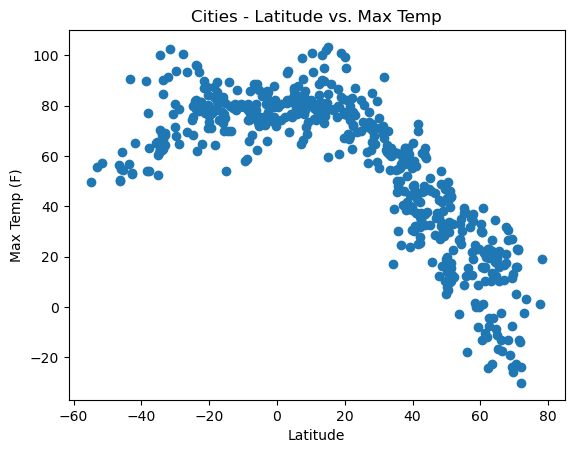

In [19]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("Cities - Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

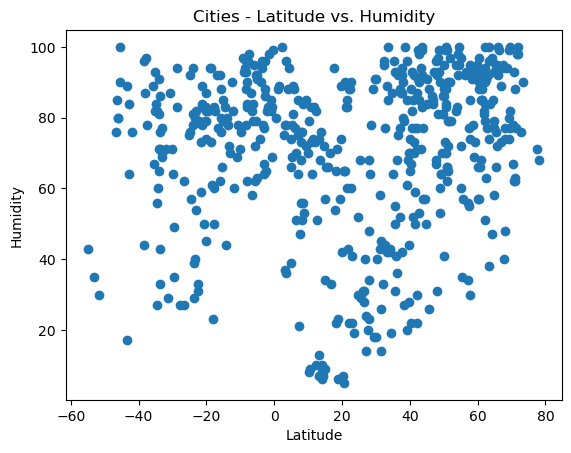

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("Cities - Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

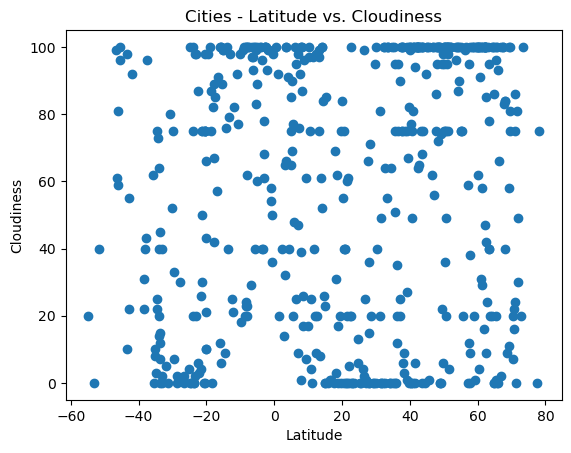

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("Cities - Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

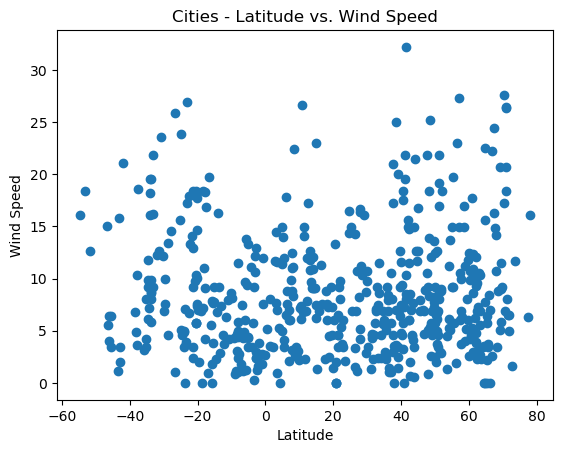

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("Cities - Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def linear_regression(xvalues, yvalues, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regression_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

    plt.scatter(xvalues, yvalues)
    plt.plot(xvalues, regression_values, "r-")
    plt.annotate(line_eq, (0,0), color = "red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    print(f"rvalue = {rvalue}")



In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-tsilma,65.4410,52.1498,17.22,95,96,5.79,RU,1678555180
1,jamestown,42.0970,-79.2353,31.64,87,100,8.05,US,1678555181
2,hanstholm,57.1167,8.6167,35.17,56,59,27.27,DK,1678555181
3,severo-kurilsk,50.6789,156.1250,29.82,88,99,6.67,RU,1678555182
5,cabo san lucas,22.8909,-109.9124,87.10,41,0,3.44,MX,1678555185


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,atuona,-9.8000,-139.0333,79.48,76,18,8.16,PF,1678555184
6,busselton,-33.6500,115.3333,62.67,71,15,5.86,AU,1678555186
9,kununurra,-15.7667,128.7333,69.78,88,6,0.00,AU,1678555188
13,mgandu,-5.9500,34.1333,62.56,95,100,5.99,TZ,1678555192
14,lebu,-37.6167,-73.6500,63.14,78,96,18.59,CL,1678555193


###  Temperature vs. Latitude Linear Regression Plot

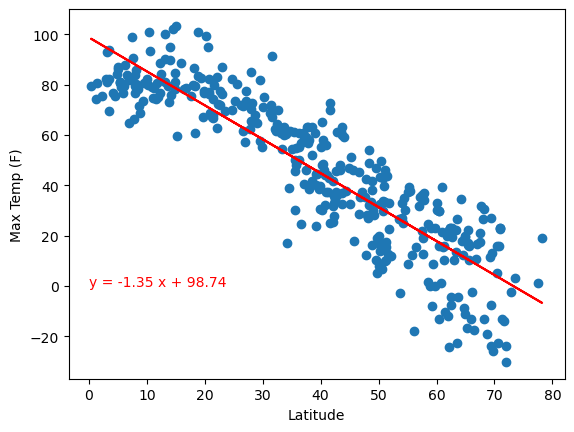

rvalue = -0.8920605745871377


In [27]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp (F)")

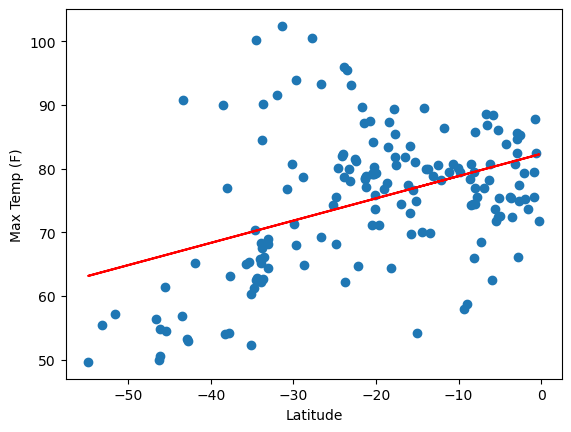

rvalue = 0.4217459492697334


In [30]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp (F)")


**Discussion about the linear relationship:** In the Northern Hemisphere, There is a strong negative correlation between latitude and temperature. In the Southern Hemisphere, there is a positive correlation between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

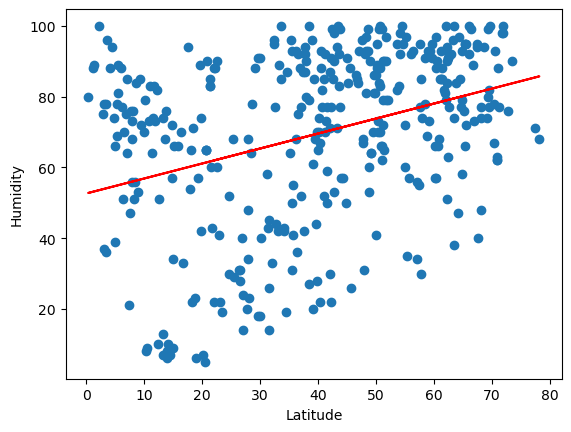

rvalue = 0.34750541256600104


In [31]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity")

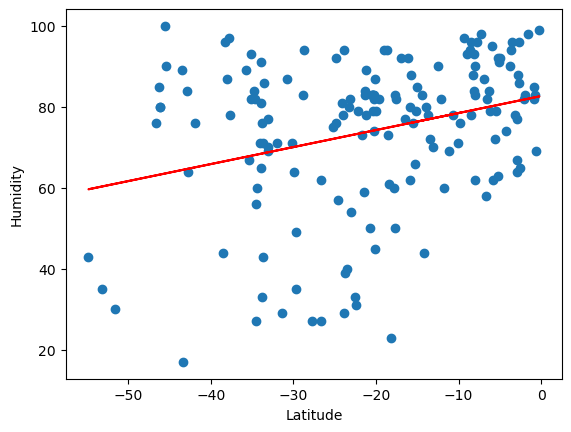

rvalue = 0.2973112971718301


In [32]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity")

**Discussion about the linear relationship:**In the Northern Hemisphere, There is a weak positive correlation between latitude and humidity. In the Southern Hemisphere, there is a weak positive correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

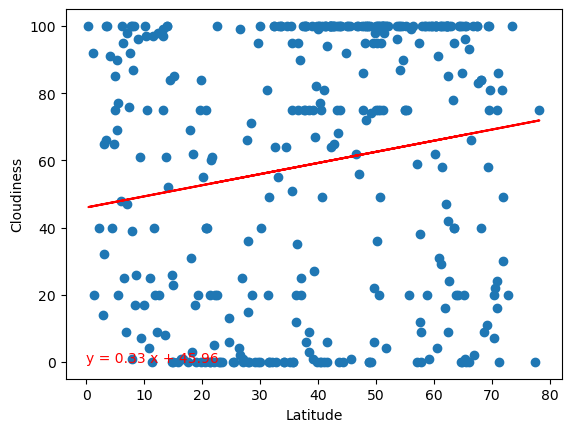

rvalue = 0.16796208389751502


In [33]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

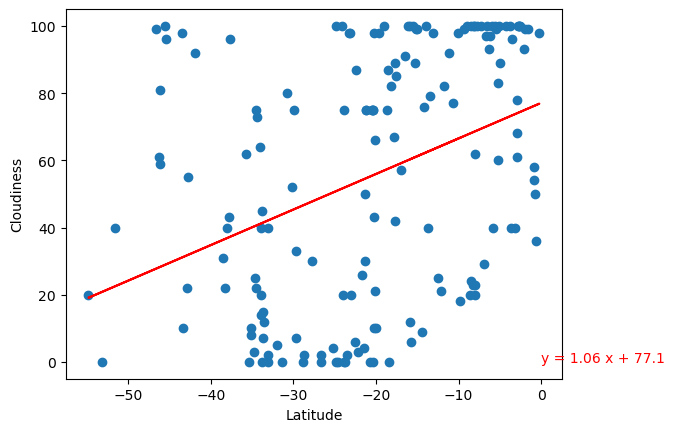

rvalue = 0.37388999516826343


In [37]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

**Discussion about the linear relationship:** In the Northern Hemisphere, There is a weak positive correlation between latitude and humidity. In the Southern Hemisphere, there is a weak positive correlation between latitude and humidity.

### Wind Speed vs. Latitude Linear Regression Plot

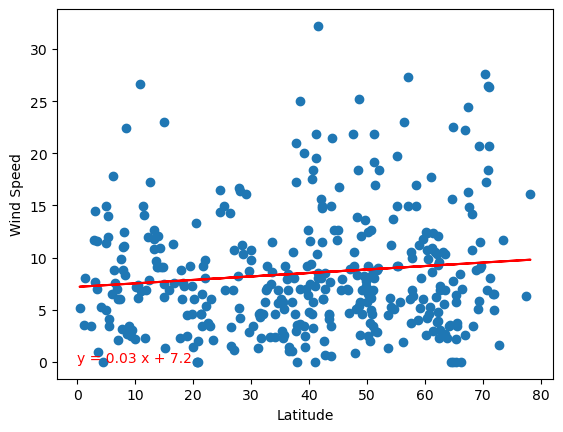

rvalue = 0.11447856430155105


In [35]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

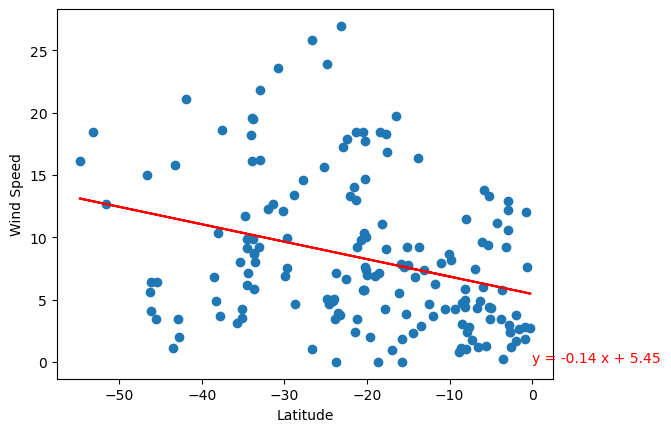

rvalue = -0.31167073372334875


In [36]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

**Discussion about the linear relationship:** In the Northern Hemisphere, There is a very weak positive correlation between latitude and wind speed. In the Southern Hemisphere, there is a negative correlation between latitude and wind speed.